## **Soal 4 - Imunisasi**

Disediakan 4 buah dataset (.csv) seputar persentase balita di Indonesia yang pernah mendapatkan imunisasi BCG, Campak, DPT & Polio dalam kurun tahun 1995-2017. Unduh dataset via kaggle: unduh di sini, lalu buatlah sebuah program python yang dapat menampilkan data-data tersebut dalam bentuk sebagai berikut:

* Data yang missing diolah dengan metode interpolasi linear, yakni jika terdapat nilai 'n.a' akan diubah menjadi nilai antara data sebelum & sesudahnya.
   - Tips: gunakan method interpolate() dari pandas).


* Usai program dieksekusi, akan muncul 2 buah figure sekaligus. Figure 1 berisi data persentase balita yang pernah diimunisasi, dan figure 2 berisi persentase balita yang belum pernah diimunisasi.

* Setiap figure berisi 4 buah diagram batang yang menunjukkan persentase balita yang pernah diimunisasi BCG, Campak, DPT & Polio selama 1995-2017. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
bcg = pd.read_csv('Balita Terimunisasi BCG 1995-2017.csv', na_values=['n.a'])
campak = pd.read_csv('Balita Terimunisasi Campak 1995-2017.csv', na_values=['n.a'])
dpt = pd.read_csv('Balita Terimunisasi DPT 1995-2017.csv', na_values=['n.a'])
polio = pd.read_csv('Balita Terimunisasi Polio 1995-2017.csv', na_values=['n.a'])

In [74]:
bcg = bcg.interpolate()
campak = campak.interpolate()
dpt = dpt.interpolate()
polio = polio.interpolate()

In [75]:
bcg = bcg.rename(columns={"% Balita yang pernah mendapat imunisasi BCG": "sdh_bcg"})
campak = campak.rename(columns={"% Balita yang pernah mendapat imunisasi Campak": "sdh_campak"})
dpt = dpt.rename(columns={"% Balita yang pernah mendapat imunisasi DPT": "sdh_dpt"})
polio = polio.rename(columns={"% Balita yang pernah mendapat imunisasi Polio": "sdh_polio"})

In [79]:
bcg['blm_bcg'] = 100 - bcg['sdh_bcg']
campak['blm_campak'] = 100 - campak['sdh_campak']
dpt['blm_dpt'] = 100 - dpt['sdh_dpt']
polio['blm_polio'] = 100 - polio['sdh_polio']

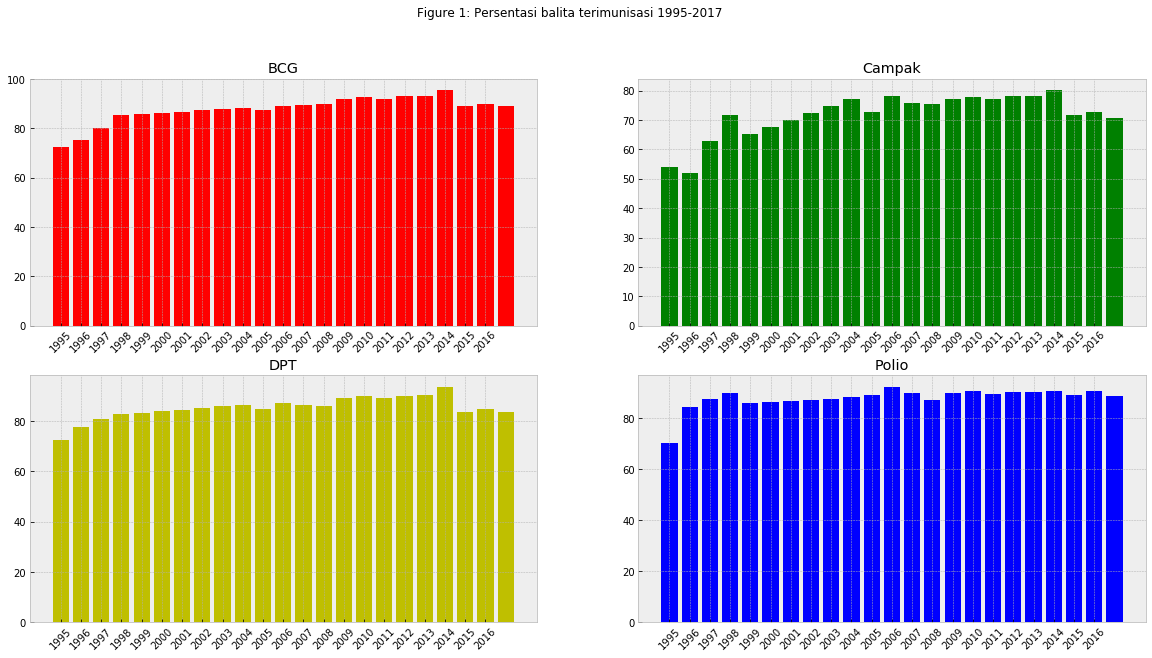

In [80]:
plt.style.use('bmh')
plt.figure('Sudah Imunisasi', figsize = (20,10))

#bcg
plt.subplot(221)
plt.bar(bcg['Tahun'], bcg['sdh_bcg'], color='r')
plt.title('BCG')
plt.xticks(range(1995,2017), rotation=45)

plt.subplot(222)
plt.bar(campak['Tahun'], campak['sdh_campak'], color='g')
plt.title('Campak')
plt.xticks(range(1995,2017), rotation=45)

plt.subplot(223)
plt.bar(dpt['Tahun'], dpt['sdh_dpt'], color='y')
plt.title('DPT')
plt.xticks(range(1995,2017), rotation=45)

plt.subplot(224)
plt.bar(polio['Tahun'], polio['sdh_polio'], color='b')
plt.title('Polio')
plt.xticks(range(1995,2017), rotation=45)

plt.suptitle('Figure 1: Persentasi balita terimunisasi 1995-2017')
plt.show()

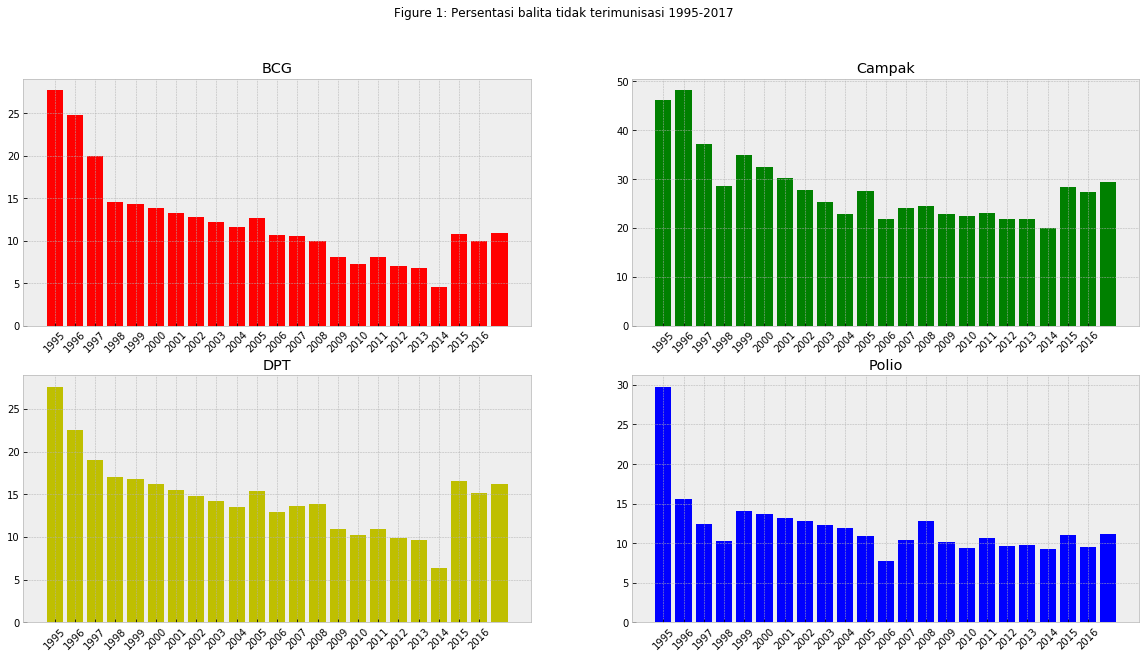

In [81]:
plt.style.use('bmh')
plt.figure('Belum Imunisasi', figsize = (20,10))

#bcg
plt.subplot(221)
plt.bar(bcg['Tahun'], bcg['blm_bcg'], color='r')
plt.title('BCG')
plt.xticks(range(1995,2017), rotation=45)

plt.subplot(222)
plt.bar(campak['Tahun'], campak['blm_campak'], color='g')
plt.title('Campak')
plt.xticks(range(1995,2017), rotation=45)

plt.subplot(223)
plt.bar(dpt['Tahun'], dpt['blm_dpt'], color='y')
plt.title('DPT')
plt.xticks(range(1995,2017), rotation=45)

plt.subplot(224)
plt.bar(polio['Tahun'], polio['blm_polio'], color='b')
plt.title('Polio')
plt.xticks(range(1995,2017), rotation=45)

plt.suptitle('Figure 1: Persentasi balita tidak terimunisasi 1995-2017')
plt.show()

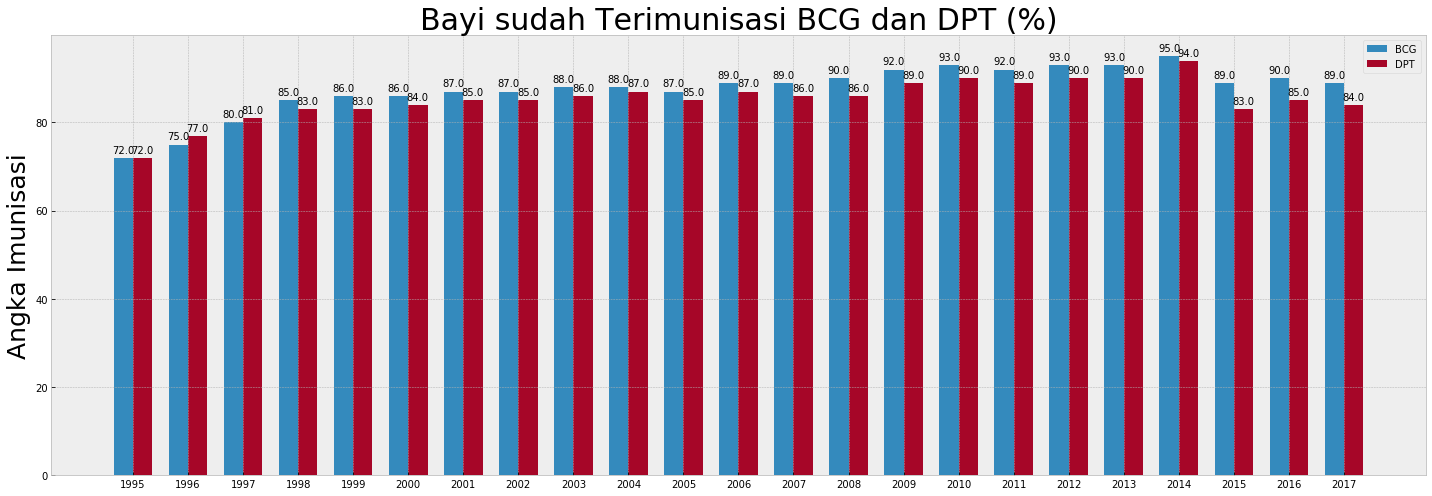

In [100]:
labels = dpt['Tahun']
x1 = round(bcg['sdh_bcg'])
x2 = round(dpt['sdh_dpt'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,7))
rects1 = ax.bar(x - width/2, x1, width, label='BCG')
rects2 = ax.bar(x + width/2, x2, width, label='DPT')

ax.set_ylabel('Angka Imunisasi', size=25)
ax.set_title('Bayi sudah Terimunisasi BCG dan DPT (%)', size=30)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()